In [29]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# import the dataset
team_Data = pd.read_csv("Resources/teamData.csv")
player_Data = pd.read_csv("Resources/playerData.csv")
cross_ref = pd.read_csv("Resources/crossReference.csv")

In [3]:
cross_ref.head()

,Team,TM
0,76ers,PHI
1,Blackhawks,TRI
2,Bobcats,CHA
3,Bommers,STB
4,Braves,BLB


In [4]:
# load the data
#del team_Data["TM"]
#team_Data

In [5]:
combined_team_data = pd.merge(team_Data, cross_ref, on="Team")
combined_team_data

,Year,Team,Record,Winning Percentage,TM
0,1964,76ers,34-46,0.425,PHI
1,1965,76ers,40-40,0.500,PHI
2,1966,76ers,55-25,0.688,PHI
3,1967,76ers,68-13,0.840,PHI
4,1968,76ers,62-20,0.756,PHI
...,...,...,...,...,...
2278,2013,Wizards,29-53,0.354,WAS
2279,2014,Wizards,44-38,0.537,WAS
2280,2015,Wizards,46-36,0.561,WAS
2281,2016,Wizards,41-41,0.500,WAS


In [6]:
combined_team_data = combined_team_data.loc[(combined_team_data["Year"] >= 1986) & (combined_team_data["Year"]< 2018)]
combined_team_data

,Year,Team,Record,Winning Percentage,TM
22,1986,76ers,54-28,0.659,PHI
23,1987,76ers,45-37,0.549,PHI
24,1988,76ers,36-46,0.439,PHI
25,1989,76ers,46-36,0.561,PHI
26,1990,76ers,53-29,0.646,PHI
...,...,...,...,...,...
2278,2013,Wizards,29-53,0.354,WAS
2279,2014,Wizards,44-38,0.537,WAS
2280,2015,Wizards,46-36,0.561,WAS
2281,2016,Wizards,41-41,0.500,WAS


In [7]:
player_Data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,10,1950.0,Charlie Black,F-C,28.0,AND,29.0,NaN,NaN,NaN,...,0.688,NaN,NaN,NaN,88.0,NaN,NaN,NaN,133.0,279.0
1,19,1950.0,Frankie Brian,G,26.0,AND,64.0,NaN,NaN,NaN,...,0.824,NaN,NaN,NaN,189.0,NaN,NaN,NaN,192.0,1138.0
2,31,1950.0,Jake Carter,F-C,25.0,AND,11.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,8.0,NaN,NaN,NaN,32.0,38.0
3,37,1950.0,Bill Closs,SF,28.0,AND,64.0,NaN,NaN,NaN,...,0.718,NaN,NaN,NaN,160.0,NaN,NaN,NaN,190.0,752.0
4,73,1950.0,Frank Gates,G,29.0,AND,64.0,NaN,NaN,NaN,...,0.622,NaN,NaN,NaN,91.0,NaN,NaN,NaN,147.0,287.0


In [8]:
# Merging Crossreference_data and player_data - NOTE: We need to check the types of the years first

player_Data["Year"].dtypes

dtype('float64')

In [9]:
# Taking player Dataframe from 1986 till 2017
player_Data = player_Data.loc[(player_Data["Year"] >= 1986.0) & (player_Data["Year"]< 2018.0)]
player_Data["Year"] = player_Data["Year"].astype(int)
player_Data

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
263,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,0.728,12.0,50.0,62.0,74.0,23.0,3.0,47.0,80.0,277.0
264,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,0.667,16.0,36.0,52.0,14.0,7.0,15.0,14.0,51.0,116.0
265,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,0.667,13.0,26.0,39.0,8.0,2.0,6.0,18.0,37.0,122.0
266,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,0.864,2.0,17.0,19.0,112.0,13.0,0.0,38.0,32.0,144.0
267,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,0.857,44.0,80.0,124.0,26.0,14.0,8.0,40.0,118.0,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24592,13341,1997,Rod Strickland,PG,30.0,WSB,82.0,81.0,2997.0,19.7,...,0.738,95.0,240.0,335.0,727.0,143.0,14.0,270.0,166.0,1410.0
24593,13365,1997,Ben Wallace,PF,22.0,WSB,34.0,0.0,197.0,6.0,...,0.300,25.0,33.0,58.0,2.0,8.0,11.0,18.0,27.0,38.0
24594,13374,1997,Chris Webber,PF,23.0,WSB,72.0,72.0,2806.0,21.8,...,0.565,238.0,505.0,743.0,331.0,122.0,137.0,230.0,258.0,1445.0
24595,13382,1997,Chris Whitney,PG,25.0,WSB,82.0,1.0,1117.0,15.2,...,0.832,13.0,91.0,104.0,182.0,49.0,4.0,68.0,100.0,430.0


In [10]:
complete_nba_data = pd.merge(player_Data, combined_team_data, left_on=["Tm","Year"], right_on=["TM","Year"])
complete_nba_data

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,Team,Record,Winning Percentage,TM
0,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,74.0,23.0,3.0,47.0,80.0,277.0,Hawks,50-32,0.610,ATL
1,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,14.0,7.0,15.0,14.0,51.0,116.0,Hawks,50-32,0.610,ATL
2,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,8.0,2.0,6.0,18.0,37.0,122.0,Hawks,50-32,0.610,ATL
3,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,112.0,13.0,0.0,38.0,32.0,144.0,Hawks,50-32,0.610,ATL
4,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,26.0,14.0,8.0,40.0,118.0,193.0,Hawks,50-32,0.610,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15257,13341,1997,Rod Strickland,PG,30.0,WSB,82.0,81.0,2997.0,19.7,...,727.0,143.0,14.0,270.0,166.0,1410.0,Bullets,44-38,0.537,WSB
15258,13365,1997,Ben Wallace,PF,22.0,WSB,34.0,0.0,197.0,6.0,...,2.0,8.0,11.0,18.0,27.0,38.0,Bullets,44-38,0.537,WSB
15259,13374,1997,Chris Webber,PF,23.0,WSB,72.0,72.0,2806.0,21.8,...,331.0,122.0,137.0,230.0,258.0,1445.0,Bullets,44-38,0.537,WSB
15260,13382,1997,Chris Whitney,PG,25.0,WSB,82.0,1.0,1117.0,15.2,...,182.0,49.0,4.0,68.0,100.0,430.0,Bullets,44-38,0.537,WSB


In [70]:
four_factor_data = complete_nba_data[["Year","Player","TM","eFG%","TOV%","ORB%","FT%","Winning Percentage"]]
four_factor_data["Four Factor Ratings"] = ((0.4*100*complete_nba_data["eFG%"]) 
                                           - (0.25*complete_nba_data["TOV%"]) 
                                           + (0.2*complete_nba_data["ORB%"]) 
                                           + (0.15*complete_nba_data["FT%"]))


four_factor_data

C:\Users\Jay D\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
0,1986,John Battle,ATL,0.455,15.0,2.1,0.728,0.610,14.97920
1,1986,Antoine Carr,ATL,0.527,11.8,6.9,0.667,0.610,19.61005
2,1986,Lorenzo Charles,ATL,0.557,14.8,5.3,0.667,0.610,19.74005
3,1986,Johnny Davis,ATL,0.435,22.2,0.6,0.864,0.610,12.09960
4,1986,Scott Hastings,ATL,0.418,17.4,7.5,0.857,0.610,13.99855
...,...,...,...,...,...,...,...,...,...
15257,1997,Rod Strickland,WSB,0.472,16.9,3.8,0.738,0.537,15.52570
15258,1997,Ben Wallace,WSB,0.348,24.7,15.1,0.300,0.537,10.81000
15259,1997,Chris Webber,WSB,0.543,15.0,10.1,0.565,0.537,20.07475
15260,1997,Chris Whitney,WSB,0.509,15.2,1.4,0.832,0.537,16.96480


In [71]:
four_factor_20seasons = four_factor_data.loc[(four_factor_data["Year"] >= 1986.0) & (four_factor_data["Year"]< 2017.0)]
four_factor_20seasons

,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
0,1986,John Battle,ATL,0.455,15.0,2.1,0.728,0.610,14.97920
1,1986,Antoine Carr,ATL,0.527,11.8,6.9,0.667,0.610,19.61005
2,1986,Lorenzo Charles,ATL,0.557,14.8,5.3,0.667,0.610,19.74005
3,1986,Johnny Davis,ATL,0.435,22.2,0.6,0.864,0.610,12.09960
4,1986,Scott Hastings,ATL,0.418,17.4,7.5,0.857,0.610,13.99855
...,...,...,...,...,...,...,...,...,...
15257,1997,Rod Strickland,WSB,0.472,16.9,3.8,0.738,0.537,15.52570
15258,1997,Ben Wallace,WSB,0.348,24.7,15.1,0.300,0.537,10.81000
15259,1997,Chris Webber,WSB,0.543,15.0,10.1,0.565,0.537,20.07475
15260,1997,Chris Whitney,WSB,0.509,15.2,1.4,0.832,0.537,16.96480


In [52]:
age_player_data =  complete_nba_data[["Year","Player","Age","G","MP","PER"]]

In [73]:
team_4factor_data = four_factor_20seasons.groupby(["TM","Year"]).mean()
team_4factor_data

eFG%       TOV%      ORB%       FT%  Winning Percentage  \
TM  Year                                                                
ATL 1986  0.474500  17.325000  5.606250  0.752625               0.610   
    1987  0.437467  16.253333  7.140000  0.750857               0.695   
    1988  0.502200  14.666667  6.160000  0.738933               0.610   
    1989  0.456154  16.038462  6.430769  0.744583               0.634   
    1990  0.453722  12.316667  5.444444  0.752353               0.500   
...            ...        ...       ...       ...                 ...   
WSB 1993  0.504684  13.900000  9.115789  0.708167               0.268   
    1994  0.449000  15.184211  6.140000  0.750667               0.293   
    1995  0.474313  15.200000  5.962500  0.727000               0.256   
    1996  0.496050  13.390000  7.890476  0.731412               0.476   
    1997  0.462400  18.386667  7.253333  0.691154               0.537   

          Four Factor Ratings  
TM  Year                       
ATL 1986            15.882894  
    1987            16.632271  
    1988            17.764173  
    1989            16.511688  
    1990            17.221971  
...                       ...  
WSB 1993            17.449281  
    1994            16.844822  
    1995            16.474050  
    1996            17.756771  
    1997            16.754442  

[876 rows x 6 columns]

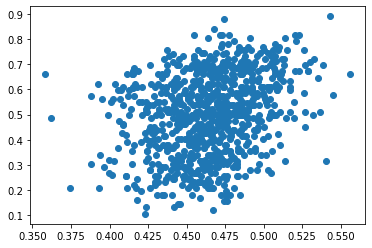

In [74]:
plt.scatter(team_4factor_data["eFG%"],team_4factor_data["Winning Percentage"])

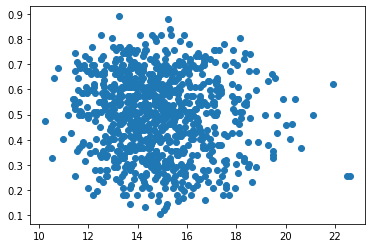

In [75]:
plt.scatter(team_4factor_data["TOV%"],team_4factor_data["Winning Percentage"])

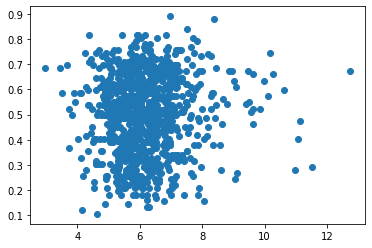

In [76]:
plt.scatter(team_4factor_data["ORB%"],team_4factor_data["Winning Percentage"])

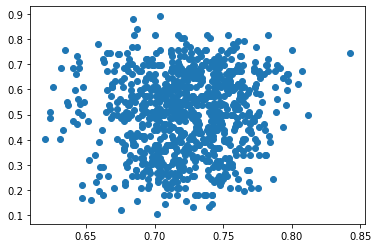

In [77]:
plt.scatter(team_4factor_data["FT%"],team_4factor_data["Winning Percentage"])

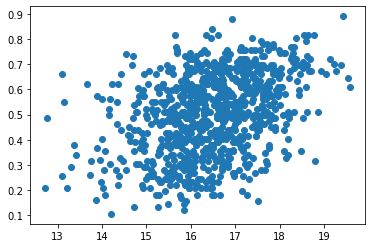

In [80]:
plt.scatter(team_4factor_data["Four Factor Ratings"], team_4factor_data["Winning Percentage"])

In [13]:
mp_quartiles = age_player_data["MP"].quantile([.25,.5,.75])
lowerq_mp = mp_quartiles[.25]
median_mp = mp_quartiles[.5]
upperq_mp = mp_quartiles[.75]
iqr_mp = upperq_mp -lowerq_mp
lower_bound_mp = lowerq_mp - (1.5*iqr_mp)
upper_bound_mp = upperq_mp + (1.5*iqr_mp)


print(f"Lower Quartile: {lowerq_mp}\n"
      f"Median: {median_mp}\n"
      f"Upper Quartile: {upperq_mp}\n"
      f"IQR: {iqr_mp}\n"
      f"Upper Bound: {upper_bound_mp} & Lower Bound: {lower_bound_mp}\n")

Lower Quartile: 292.25
Median: 972.0
Upper Quartile: 1891.75
IQR: 1599.5
Upper Bound: 4291.0 & Lower Bound: -2107.0



In [14]:
game_quartiles = age_player_data["G"].quantile([.25,.5,.75])
lowerq_game = game_quartiles[.25]
median_game = game_quartiles[.5]
upperq_game = game_quartiles[.75]
iqr_game = upperq_game -lowerq_game
lower_bound_game = lowerq_game - (1.5*iqr_game)
upper_bound_game = upperq_game + (1.5*iqr_game)


print(f"Lower Quartile: {lowerq_game}\n"
      f"Median: {median_game}\n"
      f"Upper Quartile: {upperq_game}\n"
      f"IQR: {iqr_game}\n"
      f"Upper Bound: {upper_bound_game} & Lower Bound: {lower_bound_game}\n")

Lower Quartile: 24.0
Median: 53.0
Upper Quartile: 75.0
IQR: 51.0
Upper Bound: 151.5 & Lower Bound: -52.5



In [15]:
player_names = []
mean_player_games = (age_player_data.groupby("Player")["G"].mean() >= 24)
mean_player_games

Player
A.C. Green             True
A.J. Bramlett         False
A.J. English           True
A.J. Guyton            True
A.J. Hammons          False
                      ...  
Zeljko Rebraca         True
Zendon Hamilton       False
Zoran Dragic          False
Zoran Planinic         True
Zydrunas Ilgauskas     True
Name: G, Length: 2501, dtype: bool

In [16]:
(mean_player_games.index.values) >= "True"

array([False, False, False, ...,  True,  True,  True])

In [17]:
#if (mean_player_games.index.values) >= "True":
#    player_names = mean_player_games.index

#print(player_names)

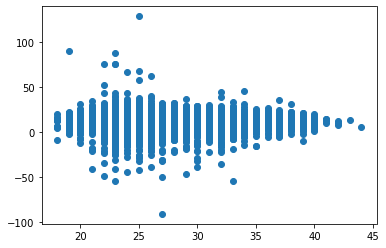

In [18]:
plt.scatter(age_player_data["Age"],age_player_data["PER"])
plt.ylim()
plt.show()

In [25]:
median_player = age_player_data.groupby("Player").median()
median_player

,Year,Age,G,MP,PER
Player,,,,,
A.C. Green,1994.0,30.0,82.0,2240.0,13.80
A.J. Bramlett,2000.0,23.0,8.0,61.0,-0.40
A.J. English,1991.5,23.5,75.5,1554.0,11.55
A.J. Guyton,2002.0,23.0,33.0,607.0,10.30
A.J. Hammons,2017.0,24.0,22.0,163.0,8.40
...,...,...,...,...,...
Zeljko Rebraca,2004.0,31.0,29.5,450.0,14.00
Zendon Hamilton,2004.0,28.0,11.0,46.0,13.50
Zoran Dragic,2015.0,25.0,8.0,37.5,8.55


In [26]:
top_players = median_player.loc[(median_player["G"]>=24.0) & (median_player["MP"]>=292.25)]
top_players

,Year,Age,G,MP,PER
Player,,,,,
A.C. Green,1994.0,30.0,82.0,2240.0,13.80
A.J. English,1991.5,23.5,75.5,1554.0,11.55
A.J. Guyton,2002.0,23.0,33.0,607.0,10.30
A.J. Price,2013.5,26.5,36.0,380.5,11.10
Aaron Brooks,2013.0,28.0,48.5,867.5,12.50
...,...,...,...,...,...
Zarko Cabarkapa,2005.0,23.0,43.0,484.5,13.20
Zaza Pachulia,2010.5,25.5,72.5,1361.0,14.05
Zeljko Rebraca,2004.0,31.0,29.5,450.0,14.00


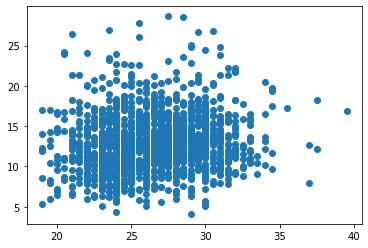

In [27]:
plt.scatter(top_players["Age"],top_players["PER"])
plt.show()

In [31]:
x_axis = top_players["Age"]
y_axis = top_players["PER"]

In [32]:
(slope, intercept, r_value, p_value, std_err) = stats.linregress(x_axis,y_axis)

In [33]:
regress_value = slope*x_axis + intercept

In [36]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

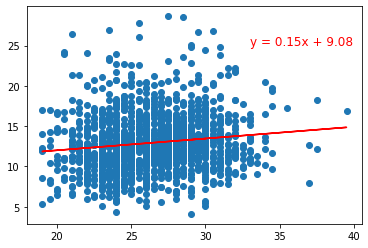

In [39]:
plt.scatter(top_players["Age"],top_players["PER"])
plt.plot(x_axis,regress_value, "r-")
plt.annotate(line_eq,(33,25), fontsize=12, color="red")
plt.show()

In [40]:
age_player_data

,Year,Player,Age,G,MP,PER
0,1986,John Battle,23.0,64.0,639.0,11.7
1,1986,Antoine Carr,24.0,17.0,258.0,14.4
2,1986,Lorenzo Charles,22.0,36.0,273.0,11.5
3,1986,Johnny Davis,30.0,27.0,402.0,13.9
4,1986,Scott Hastings,25.0,62.0,650.0,7.5
...,...,...,...,...,...,...
15257,1997,Rod Strickland,30.0,82.0,2997.0,19.7
15258,1997,Ben Wallace,22.0,34.0,197.0,6.0
15259,1997,Chris Webber,23.0,72.0,2806.0,21.8
15260,1997,Chris Whitney,25.0,82.0,1117.0,15.2


In [41]:
top_players1 = age_player_data.loc[(age_player_data["G"]>=24.0) & (age_player_data["MP"]>=292.25)]
top_players1

,Year,Player,Age,G,MP,PER
0,1986,John Battle,23.0,64.0,639.0,11.7
3,1986,Johnny Davis,30.0,27.0,402.0,13.9
4,1986,Scott Hastings,25.0,62.0,650.0,7.5
5,1986,Eddie Johnson,30.0,39.0,862.0,14.3
6,1986,Jon Koncak,22.0,82.0,1695.0,13.0
...,...,...,...,...,...,...
15254,1997,Gheorghe Muresan,25.0,73.0,1849.0,16.7
15255,1997,Tracy Murray,25.0,82.0,1814.0,14.6
15257,1997,Rod Strickland,30.0,82.0,2997.0,19.7
15259,1997,Chris Webber,23.0,72.0,2806.0,21.8


In [43]:
median_players1 = top_players1.groupby("Player").median()
median_players1

,Year,Age,G,MP,PER
Player,,,,,
A.C. Green,1994.0,30.0,82.0,2240.0,13.80
A.J. English,1991.5,23.5,75.5,1554.0,11.55
A.J. Guyton,2001.5,22.5,39.0,618.5,11.05
A.J. Price,2011.5,24.5,53.0,830.0,11.95
Aaron Brooks,2013.0,28.0,51.0,894.0,12.90
...,...,...,...,...,...
Zaza Pachulia,2010.5,25.5,72.5,1361.0,14.05
Zeljko Rebraca,2004.0,31.0,44.0,708.0,14.00
Zendon Hamilton,2003.0,27.0,50.0,660.5,14.70


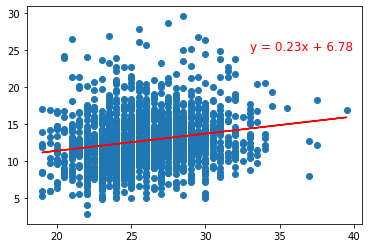

In [48]:
x_axis1 = median_players1["Age"]
y_axis1 = median_players1["PER"]
(slope1, intercept1, r_value1, p_value1, std_err1) = stats.linregress(x_axis1,y_axis1)
regress_value1 = slope1*x_axis1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_axis1,regress_value1, "r-")
plt.annotate(line_eq1,(33,25), fontsize=12, color="red")
plt.scatter(x_axis1,y_axis1)
plt.show()

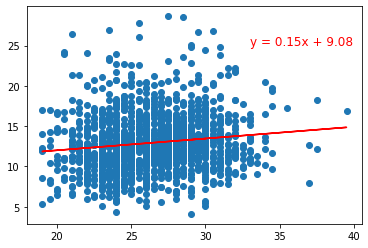

In [49]:
plt.scatter(top_players["Age"],top_players["PER"])
plt.plot(x_axis,regress_value, "r-")
plt.annotate(line_eq,(33,25), fontsize=12, color="red")
plt.show()